# Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
tf.__version__

'2.2.0'

# Dataset Description:


This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether 
the customer left the bank (closed his account) or he continues to be a customer.

1) RowNumber                   : Sort Row Numbers from 1 to 10000
2) Customer_id                 : Sort Row Numbers from 1 to 10000 
3) Surname                     : Customer's last name
4) CreditScore                 : Credit score of the customer
5) Geography                   : The country from which the customer belongs
6) Gender                      : Male or Female
7) Tenure                      : Number of years for which the customer has been with the bank
8) Balance                     : Bank balance of the customer
9) NumOfProducts               : Number of bank products the customer is utilising
10) Age                        : Age of the customer
11) HasCrCard                  : Does he have a credit card?
12) IsActiveMember             : Is he using the card or the Bank?
13) EstimatedSalary            : How much salary estimated?
    

# Problem Statement:

Find whether a customer leaves or continues to be with the bank

## Part 1 - Data Preprocessing

### Importing the dataset

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [23]:
dataset.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [30]:
#Splitting into Training and Target variables
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [25]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [26]:
print(y)

[1 0 1 ... 1 1 0]


### Encoding categorical data

Label Encoding the "Gender" column. Neural Networks should contain only numerical data

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [28]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding the "Geography" column

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [9]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Splitting the dataset into the Training set and Test set

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [13]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [14]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [15]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [16]:
#Note: Choosing activation function as sigmoid in the output layer not only gives us the prediction but it also generates the 
#probabilities of the customer that leaves or stays in the bank, If its a multiclass classification the activation 
#should be "softmax"

ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [17]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [18]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 0s 800us/step - loss: 0.5971 - accuracy: 0.7132
Epoch 2/100
250/250 [==============================] - 0s 853us/step - loss: 0.4684 - accuracy: 0.7983
Epoch 3/100
250/250 [==============================] - 0s 787us/step - loss: 0.4298 - accuracy: 0.8126
Epoch 4/100
250/250 [==============================] - 0s 800us/step - loss: 0.4144 - accuracy: 0.8185
Epoch 5/100
250/250 [==============================] - 0s 847us/step - loss: 0.4037 - accuracy: 0.8240
Epoch 6/100
250/250 [==============================] - 0s 786us/step - loss: 0.3955 - accuracy: 0.8255
Epoch 7/100
250/250 [==============================] - 0s 801us/step - loss: 0.3872 - accuracy: 0.8328
Epoch 8/100
250/250 [==============================] - 0s 826us/step - loss: 0.3792 - accuracy: 0.8370
Epoch 9/100
250/250 [==============================] - 0s 815us/step - loss: 0.3718 - accuracy: 0.8432
Epoch 10/100
250/250 [==============================] - 0s 818us/step - l

250/250 [==============================] - 0s 861us/step - loss: 0.3331 - accuracy: 0.8624
Epoch 80/100
250/250 [==============================] - 0s 828us/step - loss: 0.3331 - accuracy: 0.8621
Epoch 81/100
250/250 [==============================] - 0s 846us/step - loss: 0.3331 - accuracy: 0.8630
Epoch 82/100
250/250 [==============================] - 0s 857us/step - loss: 0.3329 - accuracy: 0.8629
Epoch 83/100
250/250 [==============================] - 0s 785us/step - loss: 0.3330 - accuracy: 0.8635
Epoch 84/100
250/250 [==============================] - 0s 991us/step - loss: 0.3327 - accuracy: 0.8646
Epoch 85/100
250/250 [==============================] - 0s 834us/step - loss: 0.3324 - accuracy: 0.8631
Epoch 86/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3329 - accuracy: 0.8629
Epoch 87/100
250/250 [==============================] - 0s 814us/step - loss: 0.3326 - accuracy: 0.8627
Epoch 88/100
250/250 [==============================] - 0s 964us/step - loss: 0

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation


Use our ANN model Let's predict the customer with the following informations will leave the bank: 

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer ?

**Solution**

In [19]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

[[False]]


Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

### Predicting the Test set results

In [20]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1523   72]
 [ 191  214]]


0.8685

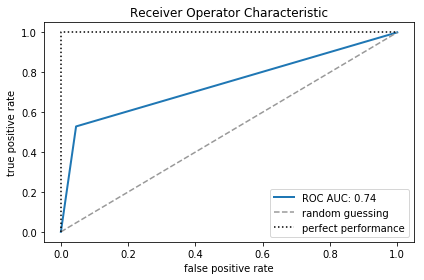

In [58]:
# calling the roc_curve, extract the probability of 
# the positive class from the predicted probability
from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

# AUC score that summarizes the ROC curve
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw = 2, label = 'ROC AUC: {:.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1],
         linestyle = '--',
         color = (0.6, 0.6, 0.6),
         label = 'random guessing')
plt.plot([0, 0, 1], [0, 1, 1],
         linestyle = ':',
         color = 'black', 
         label = 'perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc = "lower right")
plt.tight_layout()
plt.show()

In [32]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.741626997948837

In [37]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.49


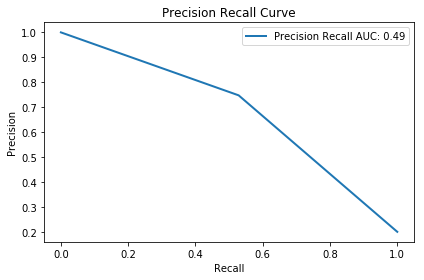

In [53]:
precision, recall, thresholds = precision_recall_curve(
    y_test, y_pred, pos_label = 1)

# AUC score that summarizes the precision recall curve
avg_precision = average_precision_score(y_test, y_pred)

label = 'Precision Recall AUC: {:.2f}'.format(avg_precision)
plt.plot(recall, precision, lw = 2, label = label)
plt.xlabel('Recall')  
plt.ylabel('Precision')  
plt.title('Precision Recall Curve')
plt.legend()
plt.tight_layout()
plt.show()